# Assignment - Intelligent Machines, Ethics and Law (COMP2400/6400)

## Name: Sunil Bastola
## Student Id: 48659851

## Recidivism Risk Classification

In this assignment, you will build a recidivism risk classification system using the COMPAS dataset.
You will manually preprocess the data in Python, handle imbalanced classes, and implement both
Logistic Regression (or other machine learning model covered in Week 10 to Week 12) and a simple Neural Network. \
You will then evaluate model performance and assess fairness across racial subgroups.

This exercise is designed to:
  - Familiarize you with data preprocessing and feature engineering.
  - Expose you to handling class imbalance via oversampling.
  - Build training and evaluating classification models.
  - Critically examine model bias and fairness metrics.

This task is graded out of 30 marks and contributes 30 marks toward the final unit assessment.

## COMPAS Dataset Description

The COMPAS Recidivism dataset was first released by ProPublica in 2016 and contains data on over 7,000 criminal defendants from Broward County, Florida, assessed between 2013 and 2014. Key fields include demographic attributes (age, sex, race), offense history metrics (juvenile felony/misdemeanor/other counts, adult priors count), current charge details (degree and description), and COMPAS-generated risk assessments (decile score and qualitative risk category). Outcome labels capture general two-year recidivism (‘is_recid’) enabling classification and fairness analyses.

## Set up

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Task 1 (10 marks)
TO DO:
1. **(2 mark)** Load the dataset:\
   Read the COMPAS recidivism dataset using pandas.
3. Clean the dataset:
   Some of the feature columns in the dataset, such as jail admission/release dates and release case numbers, are outside the scope of the classification pipeline. So we need to clean the dataframe before modeling.
   1. **(2 mark)** The column 'is_recid' can be 1 (recidivism within two years), 0 (no recidivism), or -1 (censored/invalid follow-up).\
      We need to **drop censored/invalid cases**.
   2. **(2 marks)** COMPAS includes demographic and offense history features.\
      **Select the following key predictors** for classification: **sex, age, race**, number of prior juvenile felony offenses (**'juv_fel_count'**), number of prior juvenile misdemeanor offenses (**'juv_misd_count'**), number of other juvenile offenses (**'juv_other_count'**), total prior adult offenses (**'priors_count'**), and current charge severity (**'c_charge_degree'**).\
      **Drop any records missing these values**.
3. **(2 marks)** Oversample the minority class in the training data, creating a balanced training set.
4. **(2 marks)** Split data into training and test dataset (80/20 split).

In [5]:
##############################################
# TODO: Complete this part
##############################################
# Load the data set 
df = pd.read_csv("cox-violent-parsed_filt.csv")

# Drop censored/invalid case in the dataframe ('is_recid' = -1).
df = df[df['is_recid'] != -1]

# Select the key predictors
features = ['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count',
    'priors_count', 'c_charge_degree', 'is_recid']
df = df[features]

# Drop any records missing these values.
df = df.dropna()

          sex  age              race  juv_fel_count  juv_misd_count  \
0        Male   69             Other              0               0   
3        Male   34  African-American              0               0   
4        Male   24  African-American              0               0   
9        Male   23  African-American              0               1   
10       Male   43             Other              0               0   
...       ...  ...               ...            ...             ...   
18296    Male   44          Hispanic              0               0   
18298    Male   23         Caucasian              0               2   
18303  Female   34         Caucasian              0               0   
18311  Female   31  African-American              0               0   
18314  Female   23          Hispanic              0               0   

       juv_other_count  priors_count c_charge_degree  is_recid  
0                    0             0            (F3)         0  
3                

<Axes: xlabel='race'>

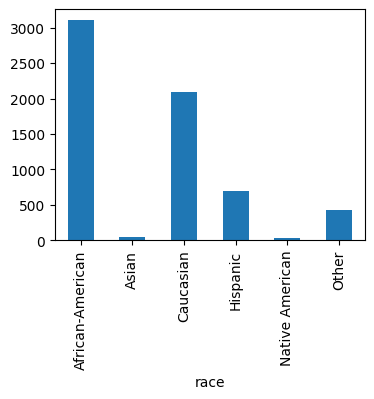

In [6]:
##############################################
# No TODO in this section — you do not need to modify this code. 
##############################################
# Print the dataframe
# Your dataframe should have 9 columns (8 feature columns and 1 label column 'is_recid')
# remove duplicates:
# One individual can have multiple violent charges, each recorded as a row. 
# In this assignment, we just drop the duplicates for simplicity.
df = df.drop_duplicates()
print (df)
print ("Filtered dataframe column and rows:", df.shape)

# Visualize the distribution information of race
GroupedData=df.groupby('race').size()
GroupedData.plot(kind='bar', figsize=(4,3))

<Axes: ylabel='count'>

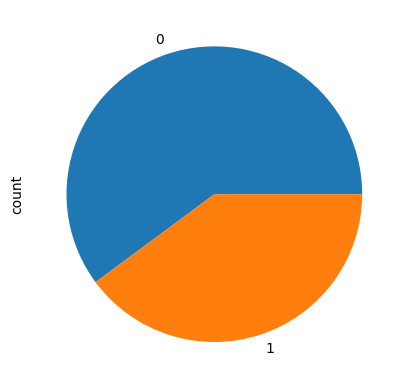

In [7]:
##############################################
# No TODO in this section — you do not need to modify this code. 
##############################################
# 'is_recid' indicates whether there's recidivism within two years (1), or no recidivism (0).
# This is what we would like to predict based on the dataset.
# Let's visualize it. 
df["is_recid"].value_counts().plot.pie()

Random over-sampling:
is_recid
0    3848
1    3848
Name: count, dtype: int64


<Axes: title={'center': 'Count (target)'}, xlabel='is_recid'>

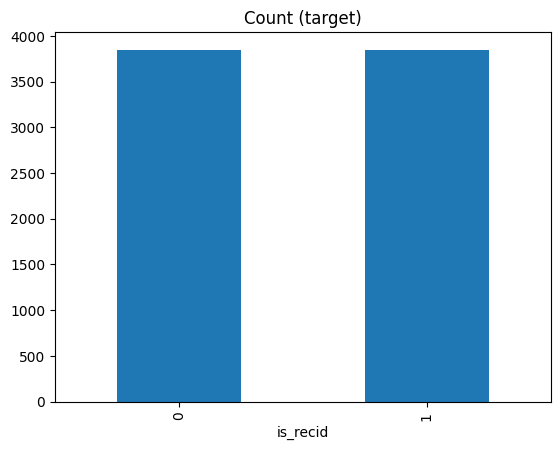

In [8]:
##############################################
# TODO: Complete this part
##############################################
# From the visualization above, we can see there are more no-recidivism cases compared to cases of recidivism.
# This imbalanced dataset is problematic for training a model.
# To handle imbalanced dataset in this assginment, we can over-sample the minority class.
# Name the oversampled df as "df_bal".

# Step 1: Count how many instances of each class exist in the 'is_recid' column
# count_0 = number of examples with is_recid == 0 (non-recidivists)
# count_1 = number of examples with is_recid == 1 (recidivists)
count_0, count_1 = len(df[df['is_recid'] == 0]), len(df[df['is_recid'] == 1])

# Step 2: Create a new DataFrame containing only the non-recidivist samples (label 0)
df_is_recid_0 = df[df['is_recid'] == 0]

# Step 3: Create another DataFrame containing only the recidivist samples (label 1)
df_is_recid_1 = df[df['is_recid'] == 1]

# Step 4: Oversample the recidivist group (label 1) to match the size of the non-recidivist group (label 0)
df_is_recid_1_over = df_is_recid_1.sample(count_0, replace=True, random_state=42)

# Step 5: Concatenate the original non-recidivist group (label 0) and the oversampled recidivist group (label 1)
# This creates a new balanced dataset where both classes have the same number of samples
df_bal = pd.concat([df_is_recid_0, df_is_recid_1_over])

##############################################
# Now let's visualize the balanced dataframe
# No actions needed for the following three lines of code.
print('Random over-sampling:')
print(df_bal["is_recid"].value_counts())
df_bal["is_recid"].value_counts().plot(kind='bar', title='Count (target)')

In [9]:
##############################################
# TODO: Complete this part
##############################################

# Split the balanced dataframe into features X and labels y 
# where X contains selected predictor columns, y contains the binary outcome 'is_recid'.
X = df_bal.drop(columns=['is_recid'])
y = df_bal['is_recid']

# Now we split data into training and test dataset (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# # Save race column separately for Task 3
# race_column = X['race']

# # For Task 3, also save race from X_test
# X_test['race'] = race_column.iloc[X_test.index].values

## Task 2 (10 points)
TO DO:
1. Data Preprocessing:
   Some features, such as 'sex' and 'c_charge_degree', are categorical.\
   Others, such as 'age' and 'juv_misd_count', are numerical.\
   We need to convert categorical variables to numeric before we can use the data for our Machine Learnining models.
   1. **(2 marks)** Numeric features: **scale to zero mean and unit variance**.
   2. **(2 marks)** Categorical features: **Use one-hot encoding for categorical features**.
3. Model training and evaluation:
   1. **(3 marks)** Train a machine learning model for predicting recidivism with a machine learning algorithm discussed during the lectures **(Week 10 to Week 12)** (or any other appropriate algorithm not covered in the lectures). Which machine learning algorithm did you choose, and why? Report accuracy, confusion matrix. 
   2. **(3 marks)** Train an **artificial neural network (Multi-Layered Perceptron Classifier (MLP))** model for recidivism prediction. Report accuracy, and confusion matrix.
  
Confusion matrix:
  
|                  | **Predicted Positive** | **Predicted Negative** |
|------------------|------------------------|------------------------|
| **Actual Positive** | True Positive (TP)       | False Negative (FN)      |
| **Actual Negative** | False Positive (FP)      | True Negative (TN)       |

In [14]:
##############################################
# TODO: Complete this part
##############################################
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# scale numerical variables to zero mean and unit variance for both traning and test dataset
numeric_features = ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_features])
X_test_num  = scaler.transform(X_test[numeric_features])


# Use one-hot encoding to encode categorical variables for both traning and test dataset
categorical_features = ['sex', 'c_charge_degree']
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = ohe.fit_transform(X_train[categorical_features])
X_test_cat  = ohe.transform(X_test[categorical_features])


# Now we can combine numeric and categorical arrays
# No actions needed for the following two lines of code.
X_train_processed = np.hstack([X_train_num, X_train_cat])
X_test_processed  = np.hstack([X_test_num,  X_test_cat])
##############################################

In [15]:
##############################################
# TODO: Complete this part
##############################################
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Logistic Regression model
logisticRegression = LogisticRegression(max_iter=1000, random_state=42)
logisticRegression.fit(X_train_processed, y_train)

# Predictions
y_pred = logisticRegression.predict(X_test_processed)

# Report the results.
print("Test accuracy: ", accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test accuracy:  0.6292207792207792
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.60      0.62       784
           1       0.61      0.66      0.64       756

    accuracy                           0.63      1540
   macro avg       0.63      0.63      0.63      1540
weighted avg       0.63      0.63      0.63      1540

Confusion Matrix:
 [[468 316]
 [255 501]]


In [16]:
##############################################
# TODO: Complete this part
##############################################
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=500, random_state=42)
mlp_model.fit(X_train_processed, y_train)

# Predictions
y_pred = mlp_model.predict(X_test_processed)

# Report the results.
print("Test accuracy: ", accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test accuracy:  0.6214285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.58      0.61       784
           1       0.60      0.66      0.63       756

    accuracy                           0.62      1540
   macro avg       0.62      0.62      0.62      1540
weighted avg       0.62      0.62      0.62      1540

Confusion Matrix:
 [[457 327]
 [256 500]]


## Task 3 (10 points)
1. **(2 marks)** For the neural network model, calculate False Positive Rate **by race**.

    Confusion matrix:
  
|                  | **Predicted Positive** | **Predicted Negative** |
|------------------|------------------------|------------------------|
| **Actual Positive** | True Positive (TP)       | False Negative (FN)      |
| **Actual Negative** | False Positive (FP)      | True Negative (TN)       |


False Positive Rate (FPR) tells you how often negative instances (not recidivate) are incorrectly classified as positive (recidivate).
Based on the confusion matrix, FPR is calculated as:

<p style="text-align:center;">False Positive Rate (FPR) = FP / (FP + TN)</p>

2. **(8 marks)** Reflect on the disparities you observed in the assignment.
    - Are there any differences in False Positive Rates between races?
    - Are there potential sources of bias in the data?
    - Describe what steps you would recommend for alleviating such bias in the intended classification model.
    - Discuss the trade-offs and potential impacts of your chosen strategies on overall model performance and fairness.

African-American: False Positive Rate (FPR)=0.491
Caucasian: False Positive Rate (FPR)=0.366
Other: False Positive Rate (FPR)=0.290
Hispanic: False Positive Rate (FPR)=0.396
Asian: False Positive Rate (FPR)=0.000
Native American: False Positive Rate (FPR)=0.600


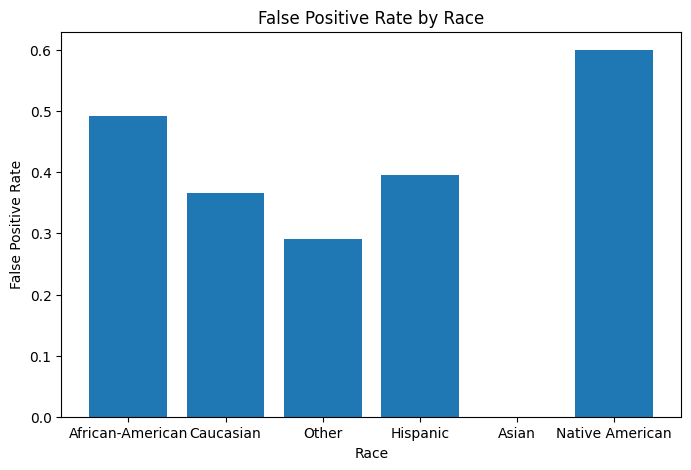

In [17]:
##############################################
# TODO: Complete this part
##############################################
import matplotlib.pyplot as plt

# To calculate FPR by race, first get the indices of each race category
# Create a dictionary to store the list of row indices for each race category
index_dict = {}

# Reset indices of X_test and y_test so they align with indexing of y_pred
# as X_test and y_test were split from a larger DataFrame (the original dataframe)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# For each row in the test set, add its index to the corresponding race category
for idx, race_category in X_test['race'].items():
    if race_category in index_dict:
        index_dict[race_category].append(idx)
    else:
        index_dict[race_category] = [idx]


# Compute FPR for each race group
# Iterate over each race category
all_fpr = []
for race in index_dict.keys():
    indices = index_dict[race]

    # Count False Positives:
    # These are the cases where the model predicted recidivism (1)
    # but the actual label is non-recidivism (0)
    num_false_positive = ((y_pred[indices] == 1) & (y_test.iloc[indices] == 0)).sum()
    
    # Count True Negatives:
    # These are the cases where the model correctly predicted non-recidivism (0)
    num_true_negative = ((y_pred[indices] == 0) & (y_test.iloc[indices] == 0)).sum()
    
    # Calculate False Positive Rate (FPR) based on the formula.
    # FPR = FP / (FP + TN)
    fpr = num_false_positive / (num_false_positive + num_true_negative) if (num_false_positive + num_true_negative) > 0 else 0

    all_fpr.append(fpr)
    print(f"{race}: False Positive Rate (FPR)={fpr:.3f}")


# Visualization

plt.figure(figsize=(8, 5))
races = index_dict.keys()
plt.bar(races, all_fpr)
plt.xlabel('Race')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate by Race')
plt.show()

# 

**Reflective Report on False Positive Rate by Race**

The False Positive Rates (FPR) vary significantly across races in the model’s predictions. African-Americans (0.491) and Native Americans (0.600) experience much higher FPRs compared to Caucasians (0.366), Hispanics (0.396), Others (0.290), and Asians (0.000). This means these groups are more often incorrectly labeled as recidivists.

These disparities likely stem from biases in the data, such as historical systemic bias, imbalanced sample sizes, and features that unintentionally encode race.

To reduce bias, strategies like balancing the dataset, using fairness-aware algorithms, and adjusting decision thresholds for different groups can be applied. However, these may slightly reduce overall accuracy and increase model complexity.

Addressing these biases is essential to ensure fairness, reduce harm to vulnerable groups, and maintain trust in the system.